In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.segmentation import random_walker

In [5]:
imageA = np.zeros((100, 100))
imageA[:, 50] = 1

d = 5
imageBC = np.copy(imageA)
imageBC[50-d : 50+d, 50] = 0

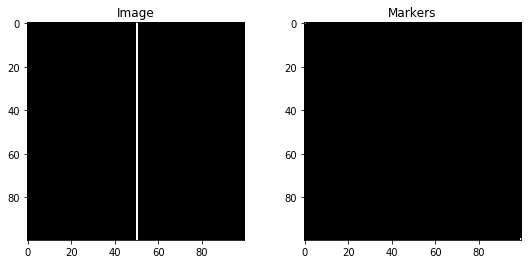

In [6]:
markers = np.zeros((imageA.shape[0], imageA.shape[1]))
markers[0][0] = 1
markers[markers.shape[0] - 1][markers.shape[1] - 1] = 2

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(right=1.3)


ax1.set_title('Image')
ax1.imshow(imageA, cmap='gray')

ax2.set_title('Markers')
ax2.imshow(markers, cmap='gray')

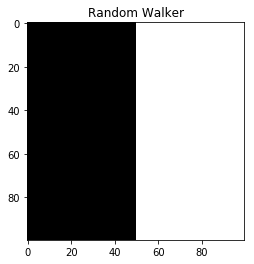

In [7]:
labels = random_walker(imageA, markers)

plt.title('Random Walker')
plt.imshow(labels, cmap='gray')

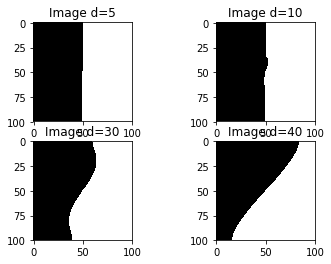

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

labels = random_walker(imageBC, markers)

ax1.set_title('Image d=5')
ax1.imshow(labels, cmap='gray')

d = 15
imageBC = np.copy(imageA)
imageBC[50-d : 50+d, 50] = 0
labels = random_walker(imageBC, markers)

ax2.set_title('Image d=10')
ax2.imshow(labels, cmap='gray')

d = 30
imageBC = np.copy(imageA)
imageBC[50-d : 50+d, 50] = 0
labels = random_walker(imageBC, markers)

ax3.set_title('Image d=30')
ax3.imshow(labels, cmap='gray')

d = 40
imageBC = np.copy(imageA)
imageBC[50-d : 50+d, 50] = 0
labels = random_walker(imageBC, markers)

ax4.set_title('Image d=40')
ax4.imshow(labels, cmap='gray')

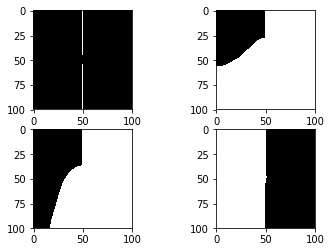

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

markers = np.zeros((imageA.shape[0], imageA.shape[1]))
markers[30][30] = 1
markers[40][40] = 2

d = 5
image = np.copy(imageA)
image[50-d : 50+d, 50] = 0
labels = random_walker(image, markers)

ax1.imshow(image, cmap='gray')
ax2.imshow(labels, cmap='gray')


markers = np.zeros((imageA.shape[0], imageA.shape[1]))
markers[0][0] = 1
markers[10][55] = 2

labels = random_walker(image, markers)
ax3.imshow(labels, cmap='gray')

markers = np.zeros((imageA.shape[0], imageA.shape[1]))
markers[70][85] = 1
markers[30][25] = 2

labels = random_walker(image, markers)
ax4.imshow(labels, cmap='gray')

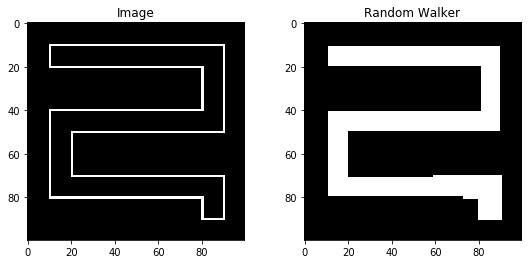

In [40]:
import h5py
image = h5py.File('maze.h5', 'r')
keys = list(image.keys())

maze = np.array(image[keys[0]])

markers = np.zeros((maze.shape[0], maze.shape[1]))
markers[5][5] = 1
markers[85][85] = 2

labels = random_walker(maze, markers, beta=20)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(right=1.3)


ax1.set_title('Image')
ax1.imshow(maze, cmap='gray')

ax2.set_title('Random Walker')
ax2.imshow(labels, cmap='gray')